<a href="https://colab.research.google.com/github/marcelohpos/PROJETO-ICD/blob/master/notebooks/Testes_de_Hip%C3%B3teses_e_ICs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
import numpy as np
import scipy.stats as st

In [ ]:
# Carregar os dados
url1 = "https://raw.githubusercontent.com/marcelohpos/PROJETO-ICD/master/datasets/LA_daily_air_quality_clean.csv"
dados_clima = pd.read_csv(url1)

url2 = "https://raw.githubusercontent.com/marcelohpos/PROJETO-ICD/master/datasets/LA_daily_climate_clean.csv"
dados_temp = pd.read_csv(url2)

##**Intervalo de Confiança**



## **Pergunta Principal: A média dos níveis de poluição em Brasília difere de forma estatisticamente significativa da média das outras capitais da América Latina?**


Antes de executar um Teste de Hipóteses, vamos fazer uma comparação e análise visual envolvendo Intervalos de Confiança.

In [ ]:
indicadores_poluicao = [
    'PM10', 'PM2_5', 'Monóxido de Carbono (CO)',
    'Dióxido de Nitrogênio (NO2)', 'Dioxido de Enxofre(SO2)',
    'Ozônio(O3)'
]
media_cidades = dados_clima[indicadores_poluicao + ['Cidade']].groupby('Cidade').mean().reset_index()

In [ ]:
media_cidades

,Cidade,PM10,PM2_5,Monóxido de Carbono (CO),Dióxido de Nitrogênio (NO2),Dioxido de Enxofre(SO2),Ozônio(O3)
0,Assunção,18.810703,13.113898,336.381789,8.830911,0.667173,42.722045
1,Bella Vista,15.604633,9.694249,202.400958,8.472045,4.135543,54.314696
2,Bogotá,30.747444,21.546326,897.638978,37.555751,9.121885,20.544728
3,Brasília,16.501438,11.519010,402.910543,31.909824,2.828275,34.373802
4,Buenos Aires,15.860383,10.664696,388.857827,34.535863,14.000559,21.153355
5,Caracas,19.557508,13.438818,499.789137,29.704233,17.062141,21.712460
6,Cidade da Guatemala,20.723802,14.196326,304.244409,8.562780,2.169249,66.006390
7,Cidade do México,22.703035,15.520447,451.060703,27.372684,23.056150,109.525559
8,La Habana,16.501757,9.255112,155.889776,8.576677,11.410304,66.364217
9,Lima,20.578754,12.510224,179.531949,19.921326,6.781070,33.984026


In [ ]:
brasilia = media_cidades[media_cidades['Cidade'] == 'Brasília'][indicadores_poluicao]
outras = media_cidades[media_cidades['Cidade'] != 'Brasília'][indicadores_poluicao]

In [ ]:
#IC para a média
from scipy import stats

def ic_media(data, confianca=0.95):
    data.dropna()
    n = len(data)
    mean = np.mean(data)
    sem = st.sem(data)  # erro padrão da média
    t= st.t.ppf((1 + confianca) / 2, n - 1)
    return mean, mean - t * sem, mean + t * sem

In [ ]:
for poluente in indicadores_poluicao:
    mean_o, lower_o, upper_o = ic_media(outras[poluente])

    print(f"{poluente}:")
    print(f"  Cidades da América Latina (exceto Brasília):   {mean_o:.2f} [{lower_o:.2f}, {upper_o:.2f}]\n")

PM10:
  Cidades da América Latina (exceto Brasília):   20.89 [16.24, 25.54]

PM2_5:
  Cidades da América Latina (exceto Brasília):   13.88 [10.61, 17.15]

Monóxido de Carbono (CO):
  Cidades da América Latina (exceto Brasília):   415.54 [255.97, 575.10]

Dióxido de Nitrogênio (NO2):
  Cidades da América Latina (exceto Brasília):   21.99 [14.00, 29.98]

Dioxido de Enxofre(SO2):
  Cidades da América Latina (exceto Brasília):   9.25 [5.66, 12.84]

Ozônio(O3):
  Cidades da América Latina (exceto Brasília):   48.19 [36.63, 59.75]



In [ ]:
print("Médias de Brasília:\n")
for poluente in indicadores_poluicao:
    print(f"{poluente}: {brasilia[poluente].mean()}")

Médias de Brasília:

PM10: 16.501437699680512
PM2_5: 11.519009584664536
Monóxido de Carbono (CO): 402.9105431309904
Dióxido de Nitrogênio (NO2): 31.909824281150158
Dioxido de Enxofre(SO2): 2.8282747603833864
Ozônio(O3): 34.373801916932905


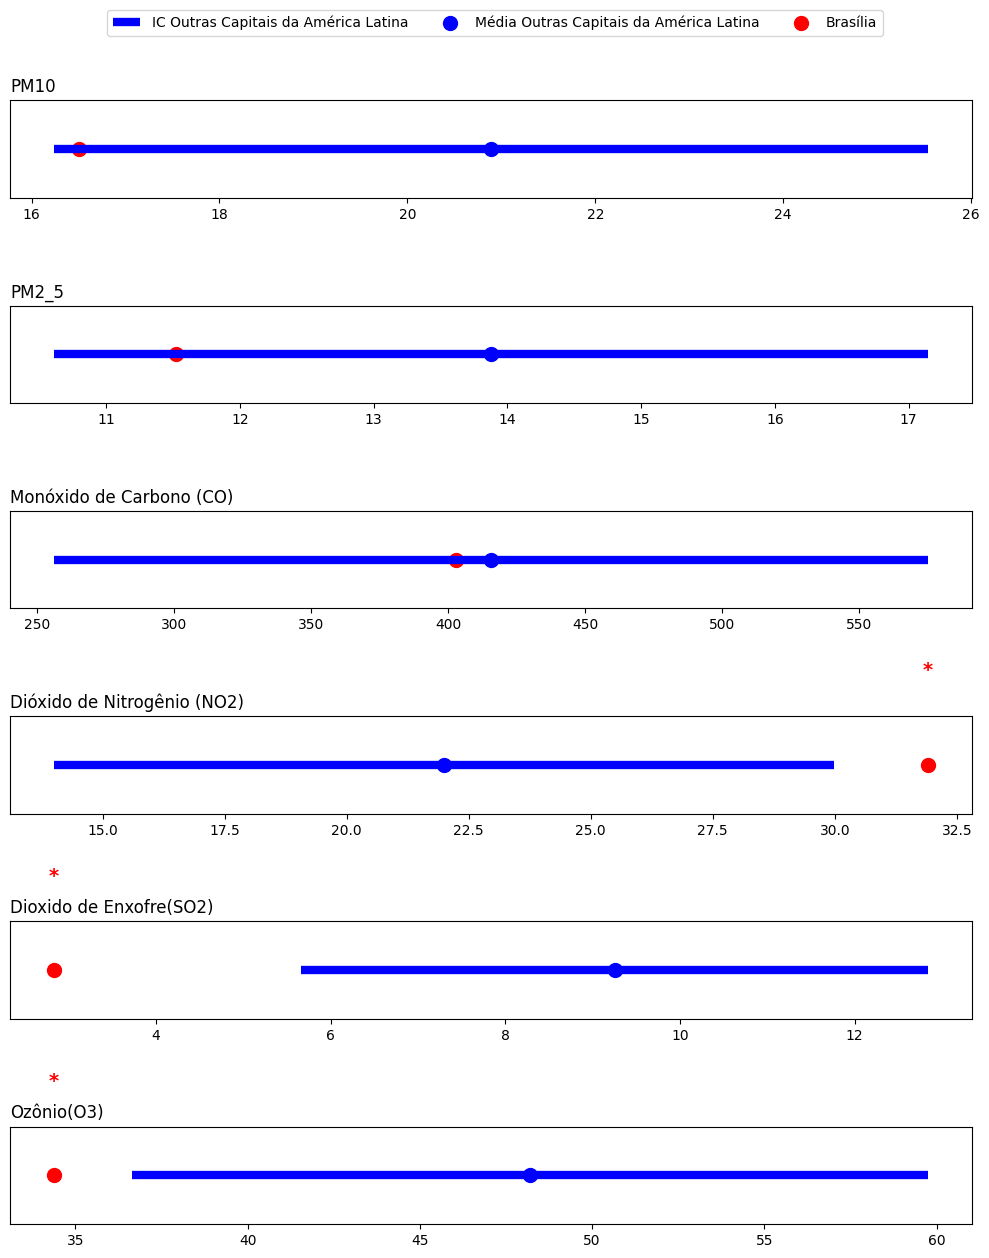

In [ ]:
# Função IC
def ic_media(data, confianca=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confianca) / 2., n-1)
    return mean, mean - h, mean + h

# Preparar dados
poluentes = []
medias_outras = []
ic_outras = []
brasilia_valores = []

for poluente in indicadores_poluicao:
    mean_o, lower_o, upper_o = ic_media(outras[poluente])
    val_b = brasilia[poluente].iloc[0]

    poluentes.append(poluente)
    medias_outras.append(mean_o)
    ic_outras.append((lower_o, upper_o))
    brasilia_valores.append(val_b)

# --- Plot horizontal ---
fig, axes = plt.subplots(len(indicadores_poluicao), 1, figsize=(10, 2*len(indicadores_poluicao)), sharex=False)

for i, poluente in enumerate(indicadores_poluicao):
    lower, upper = ic_outras[i]
    mean_o = medias_outras[i]
    val_b = brasilia_valores[i]

    # IC das outras cidades (barra horizontal)
    axes[i].hlines(y=0.5, xmin=lower, xmax=upper, color='blue', lw=6, label='IC Outras Capitais da América Latina')
    axes[i].scatter(mean_o, 0.5, color='blue', s=100, label='Média Outras Capitais da América Latina')
    axes[i].scatter(val_b, 0.5, color='red', s=100, label='Brasília')

    # Marcar com asterisco se Brasília estiver fora do IC
    if val_b < lower or val_b > upper:
        axes[i].text(val_b, 0.55, '*', color='red', fontsize=14, fontweight='bold', ha='center')

    axes[i].set_yticks([])
    axes[i].set_title(poluente, loc='left')

# Colocar legenda **acima de todos os subplots**
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
plt.show()


Isso nos traz uma boa intuição, mas é preciso realizar um teste de hipótese formal para tirar conclusões.

# **Teste de Hipóteses**

Hipótese nula (H0): A média de Brasília é igual à média das outras capitais da América Latina.

Hipótese alternativa (H1): A média de Brasília é diferente da média das outras capitais da América Latina.

In [ ]:
brasilia_valores=dados_clima[dados_clima['Cidade']=='Brasília']
outras_valores=dados_clima[dados_clima['Cidade']!='Brasília']

Primeiramente, verifica se as variâncias são iguais ou diferentes.

In [ ]:
import numpy as np
from scipy.stats import f
print("--- Teste de Variância ---\n")
for poluente in indicadores_poluicao:

  print(f"Poluente: {poluente}")
  # --- Dados das amostras ---
  amostra1 = np.array(brasilia_valores[poluente].dropna().values)
  amostra2 = np.array(outras_valores[poluente].dropna().values)

  n1 = len(amostra1)
  n2 = len(amostra2)

  s1_sq = np.var(amostra1, ddof=1)  # Variância amostral
  s2_sq = np.var(amostra2, ddof=1)

  # --- Teste F ---
  F_obs = s1_sq / s2_sq
  alpha = 0.05

  # Graus de liberdade
  df1 = n1 - 1
  df2 = n2 - 1

  # Valores críticos para teste bilateral
  F_lower = f.ppf(alpha/2, df1, df2)
  F_upper = f.ppf(1 - alpha/2, df1, df2)

  print(f"Variâncias amostrais: s1^2 = {s1_sq:.2f}, s2^2 = {s2_sq:.2f}")
  print(f"Estatística F observada: {F_obs:.2f}")
  print(f"Região de aceitação: [{F_lower:.2f}, {F_upper:.2f}]")

  if F_obs < F_lower or F_obs > F_upper:
      print("Rejeita H0: variâncias diferentes")
  else:
      print("Não rejeita H0: variâncias podem ser iguais")
  print("\n")


--- Teste de Variância ---

Poluente: PM10
Variâncias amostrais: s1^2 = 72.98, s2^2 = 295.17
Estatística F observada: 0.25
Região de aceitação: [0.89, 1.12]
Rejeita H0: variâncias diferentes


Poluente: PM2_5
Variâncias amostrais: s1^2 = 35.50, s2^2 = 141.11
Estatística F observada: 0.25
Região de aceitação: [0.89, 1.12]
Rejeita H0: variâncias diferentes


Poluente: Monóxido de Carbono (CO)
Variâncias amostrais: s1^2 = 32295.21, s2^2 = 258035.90
Estatística F observada: 0.13
Região de aceitação: [0.89, 1.12]
Rejeita H0: variâncias diferentes


Poluente: Dióxido de Nitrogênio (NO2)
Variâncias amostrais: s1^2 = 317.33, s2^2 = 628.18
Estatística F observada: 0.51
Região de aceitação: [0.89, 1.12]
Rejeita H0: variâncias diferentes


Poluente: Dioxido de Enxofre(SO2)
Variâncias amostrais: s1^2 = 1.75, s2^2 = 194.68
Estatística F observada: 0.01
Região de aceitação: [0.89, 1.12]
Rejeita H0: variâncias diferentes


Poluente: Ozônio(O3)
Variâncias amostrais: s1^2 = 448.63, s2^2 = 1071.74
Estat

Agora, fazemos o teste t para comparação das médias de duas populações, para variâncias desconhecidas e diferentes.

In [ ]:
from scipy.stats import ttest_ind
resultados = []

for poluente in indicadores_poluicao:
    # Pegando apenas os valores do poluente
    b = brasilia_valores[poluente].dropna()
    o = outras_valores[poluente].dropna()

    # Teste t de Welch (comparacao das médias; variâncias desconhecidas e diferentes)
    t_stat, p_val = ttest_ind(b, o, equal_var=False)

    resultados.append({
        'Poluente': poluente,
        'Média Brasília': b.mean(),
        'Média das Outras Capitais da América Latina': o.mean(),
        't-Statistic': t_stat,
        'p-Valor': p_val
    })

# Transformar em DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados


,Poluente,Média Brasília,Média das Outras Capitais da América Latina,t-Statistic,p-Valor
0,PM10,16.501438,20.889003,-11.667822,1.986847e-29
1,PM2_5,11.519010,13.876400,-9.002231,1.263986e-18
2,Monóxido de Carbono (CO),402.910543,415.535480,-1.474767,1.405271e-01
3,Dióxido de Nitrogênio (NO2),31.909824,21.987977,13.261770,2.893329e-36
4,Dioxido de Enxofre(SO2),2.828275,9.251522,-46.402395,0.000000e+00
5,Ozônio(O3),34.373802,48.190012,-15.382038,6.581365e-47


In [ ]:
print("Conclusões: \n")
for i in range(len(df_resultados)):
    p_val = df_resultados.loc[i, 'p-Valor']
    poluente = df_resultados.loc[i, 'Poluente']

    if not np.isnan(p_val) and p_val < 0.05: #p-valor < 0.05
        print(f"A diferença entre a média de Brasília e das outras capitais da América Latina para {poluente} é significativa a um nível de confiança de 5%.")
    else:
        print(f"Não há evidência suficiente para afirmar que a média de Brasília é diferente da média das outras capitais da América Latina para {poluente} a um nível de significância de 5%.")

Conclusões: 

A diferença entre a média de Brasília e das outras capitais da América Latina para PM10 é significativa a um nível de confiança de 5%.
A diferença entre a média de Brasília e das outras capitais da América Latina para PM2_5 é significativa a um nível de confiança de 5%.
Não há evidência suficiente para afirmar que a média de Brasília é diferente da média das outras capitais da América Latina para Monóxido de Carbono (CO) a um nível de significância de 5%.
A diferença entre a média de Brasília e das outras capitais da América Latina para Dióxido de Nitrogênio (NO2) é significativa a um nível de confiança de 5%.
A diferença entre a média de Brasília e das outras capitais da América Latina para Dioxido de Enxofre(SO2) é significativa a um nível de confiança de 5%.
A diferença entre a média de Brasília e das outras capitais da América Latina para Ozônio(O3) é significativa a um nível de confiança de 5%.
